<a href="https://colab.research.google.com/github/farheenfathimaa/TensorFlow-DeepLearning/blob/main/02_neural_network_classification_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow
In this notebook we're going to learn how to write neural networks for classification problems.

A **classification** is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Mutliclass classification
* Multilabel classification

See full course materials on GitHub: [link](https://github.com/mrdbourke/tensorflow-deep-learning/)

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now... let's visualize it!

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [5]:
circles["label"].value_counts()

label
1    500
0    500
Name: count, dtype: int64

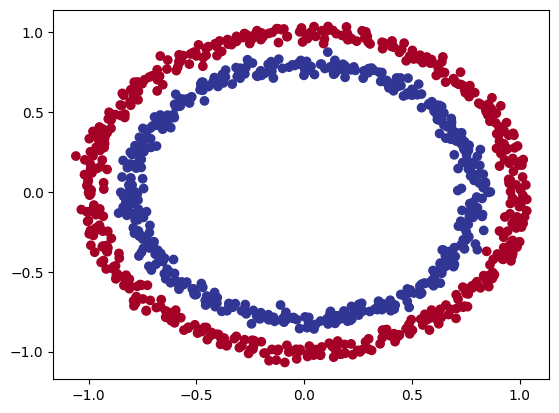

In [6]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

🛠 Exercise: Before pushing forward, spend 10-minutes playing around with [playground.tensorflow.org](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.36999&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=fals) building and running different neural networks. See what happens when you change different hyperparameters.


## Input and output shapes

In [7]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [9]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling
The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...
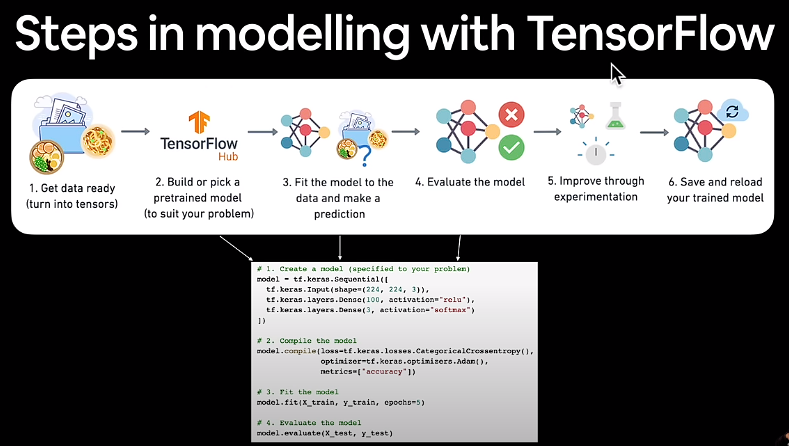

In [10]:
# Import tensorflow
import tensorflow as tf
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 6.3739 - accuracy: 0.4870
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 5.7832 - accuracy: 0.4770
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 5.4257 - accuracy: 0.4590
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 4.9064 - accuracy: 0.4540
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 4.4804 - accuracy: 0.4640


In [11]:
# Let's try and improve our model by training it for longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [12]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [13]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7952 - accuracy: 0.4870


[0.7952142953872681, 0.4869999885559082]

## Improving our model
Let's look into our bag of tricks to see how we can improve our model.

1. **Create a model** - we might to add more layers or increase the number of hidden units within a layer.
2. **Compiling a model** - here we might to choose a different optimization function such as Adam instead of SGD.
3. **Fitting a model** - perhaps we might fit our model for more epochs (leave it training for longer).

In [14]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model(3 layers this time)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # added 100 dense neurons
    tf.keras.layers.Dense(10), # added another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [15]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.4980


[0.6936265826225281, 0.49799999594688416]

**🔑 Note:** Whenever your model is performing strangely or there's something going on with your data you're not quite sure of, remember these three words: **visualize, visualize, visualize**. Inspect your data, inspect your model, inpsect your model's predictions.

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [16]:
import numpy as np

In [17]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function was inspired by two resources:
   1. https://cs231n.github.io/neural-networks-case-study/
   2. https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classification


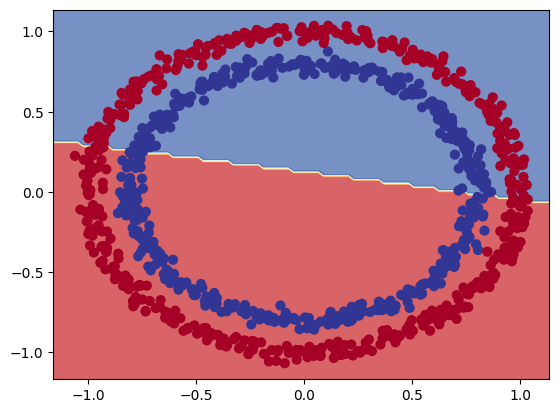

In [18]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [19]:
# Let's see if our model can be used for a regression problem...
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our rmodel to the regression data
#model_3.fit(X_reg_train, y_reg_train, epochs=100)

Oh wait... we compiled our model for a binary classification problem.

But... we're now working on a regression problem, let's change the model to suit our data.

In [20]:
# Enable NumPy behavior for TensorFlow tensors
tf.experimental.numpy.experimental_enable_numpy_behavior()

# Now you can use NumPy-like methods on tensors
X_reg_train = X_reg_train.reshape(-1, 1)
X_reg_test = X_reg_test.reshape(-1, 1)
y_reg_train = y_reg_train.reshape(-1, 1)
y_reg_test = y_reg_test.reshape(-1, 1)

In [21]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 144.9535 - mae: 144.9535
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 57.9493 - mae: 57.9493
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 58.9998 - mae: 58.9998
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 54.2109 - mae: 54.2109
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 43.1357 - mae: 43.1357
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 44.5571 - mae: 44.5571
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 42.8504 - mae: 42.8504
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 43.0200 - mae: 43.0200
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 42.2954 - mae: 42.2954
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 42.7023 - mae: 42.7023
Epoch 11/100
5/5 [==============================] - 0s 3m

2/2 [==============================] - 0s 7ms/step


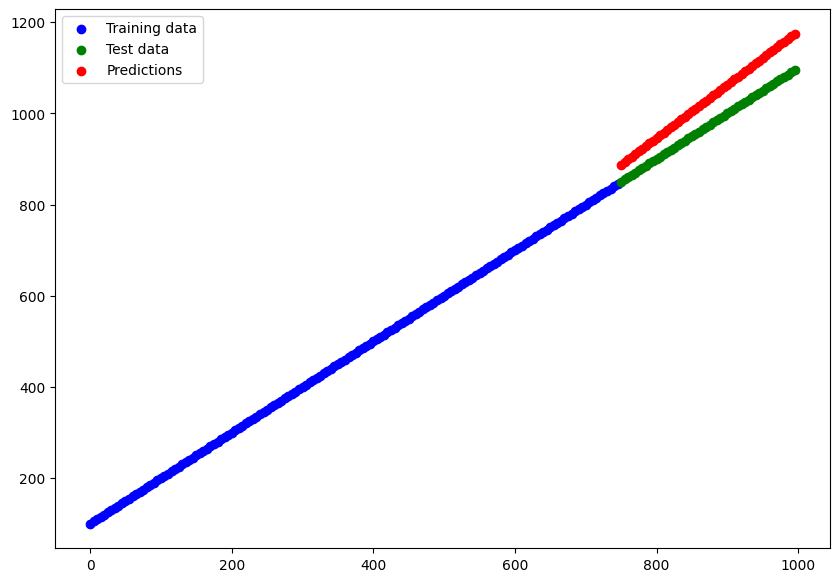

In [22]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

## The missing piece: Non-linearity
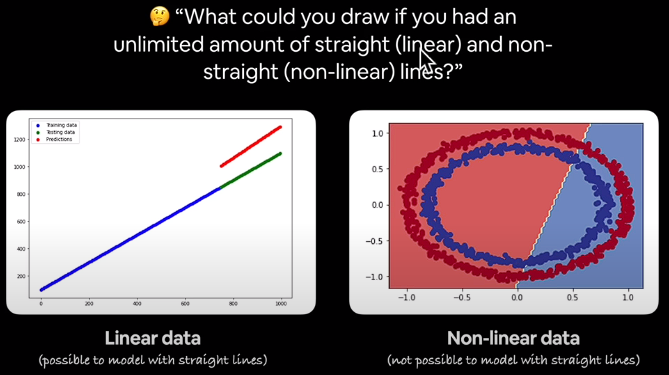

In [23]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.8224 - accuracy: 0.4840
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7975 - accuracy: 0.4860
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7882 - accuracy: 0.4860
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7765 - accuracy: 0.4850
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7459 - accuracy: 0.4840
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7187 - accuracy: 0.4830
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7086 - accuracy: 0.4830
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7073 - accuracy: 0.4830
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6977 - accuracy: 0.4830
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6889 - accuracy: 0.4840
Epoch 11/

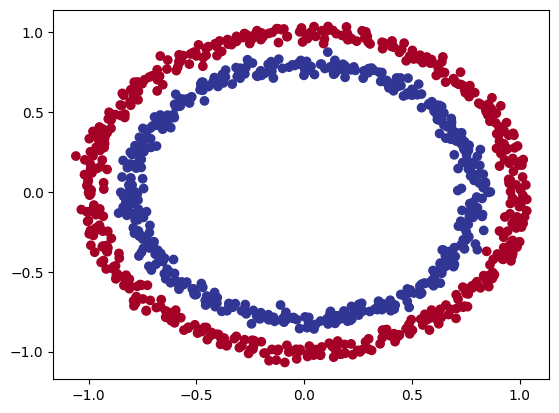

In [24]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classification


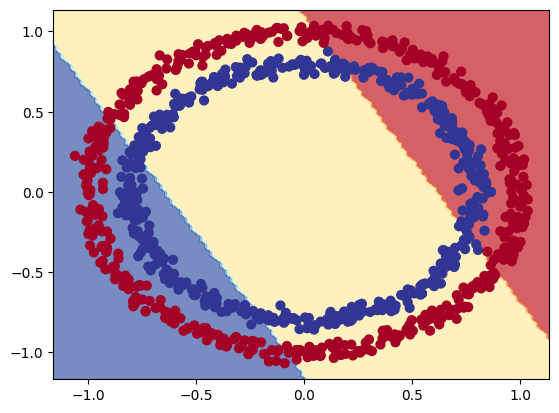

In [25]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

Let's try build our first neural network with a non-linear activation function.

In [26]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 5.8467 - accuracy: 0.4850
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8182 - accuracy: 0.4830
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7944 - accuracy: 0.4830
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 5.7708 - accuracy: 0.4830
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7289 - accuracy: 0.4820
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7083 - accuracy: 0.4820
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 5.6857 - accuracy: 0.4840
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 5.6830 - accuracy: 0.4840
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 5.6808 - accuracy: 0.4840
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 5.6791 - accuracy: 0.4840
Epoch 11/

In [27]:
# Time to replicate the multi-layer neural network from TensorFlow playground in code...

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 6.6360 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 6.0456 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 5.4589 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 4.0499 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 3.6744 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 3.5362 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 3ms/step - loss: 3.3559 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 3.2200 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 3ms/step - loss: 3.0842 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 3ms/step - loss: 2.9372 - accuracy: 0.5000
Epoch 11/

In [28]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.5576 - accuracy: 0.7030


[0.5575690269470215, 0.703000009059906]

313/313 [==============================] - 1s 1ms/step
doing binary classification


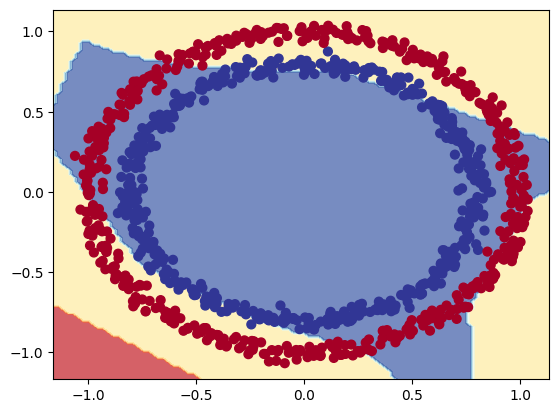

In [29]:
# How do our model predictions look?
plot_decision_boundary(model=model_6,
                       X=X,
                       y=y)

In [30]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. fit the model
history = model_7.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 0.7174 - accuracy: 0.4940
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7101 - accuracy: 0.4990
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7064 - accuracy: 0.4970
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7038 - accuracy: 0.5010
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7020 - accuracy: 0.4980
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7004 - accuracy: 0.4970
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6986 - accuracy: 0.5050
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.5200
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6960 - accuracy: 0.5240
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5270
Epoch 11/

In [31]:
# 4. Evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0360 - accuracy: 0.9980


[0.036026258021593094, 0.9980000257492065]

313/313 [==============================] - 0s 1ms/step
doing binary classification


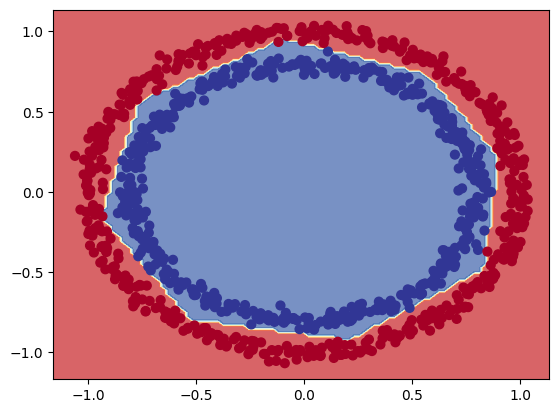

In [32]:
# Let's visualize our incredible metrics
plot_decision_boundary(model_7, X, y)

**🤔 Question:** What's wrong the predictions we've made? Are we really evaluating our model correctly? Hint: what data did the model learn on and what data did we predict on?

**🔑 Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action.

In [33]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

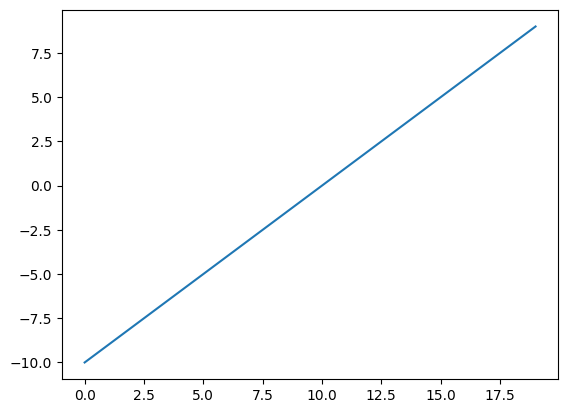

In [34]:
# Visualize our toy tensor
plt.plot(A);

In [35]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

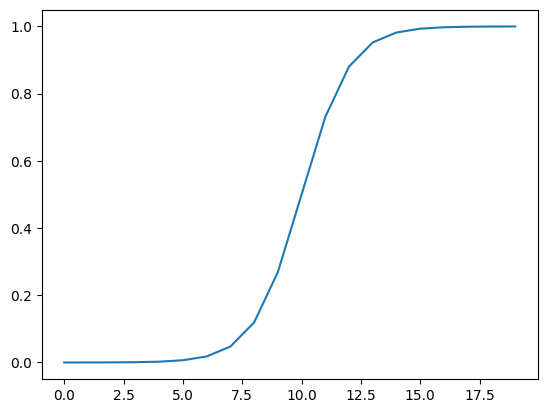

In [36]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A));

In [37]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

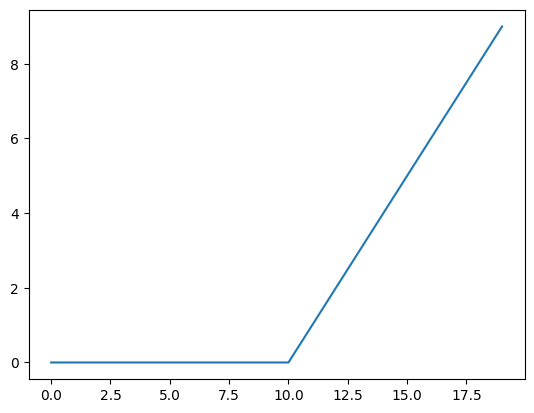

In [38]:
# Plot ReLU-modified tensor
plt.plot(relu(A));

In [39]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

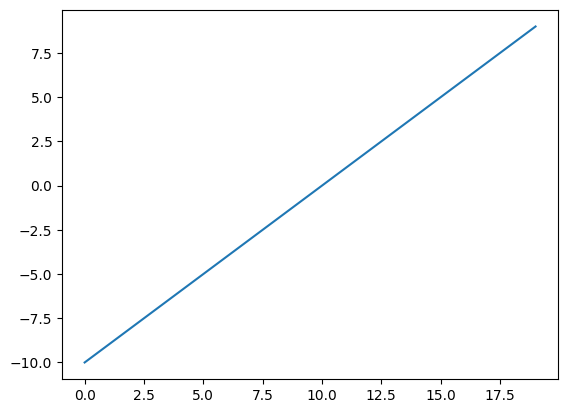

In [40]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A));

In [41]:
# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

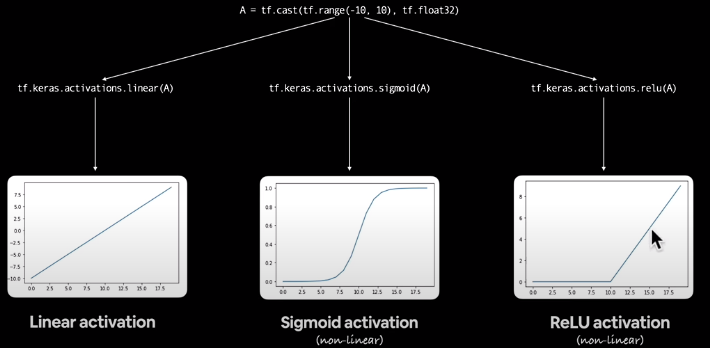

## Evaluating and improving our classification model
So far we've been training and testing on the same dataset...

However, in machine learning this is basically a sin.

So let's create a training and test set.

In [42]:
# Check how many examples we have
len(X)

1000

In [43]:
# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [44]:
# Let's recreate a model to fit on the training data and evaluate on the testing data

# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])

# 3. fit the model
history = model_8.fit(X_train, y_train, epochs=250)

Epoch 1/250
25/25 [==============================] - 1s 2ms/step - loss: 0.7392 - accuracy: 0.5000
Epoch 2/250
25/25 [==============================] - 0s 2ms/step - loss: 0.7286 - accuracy: 0.5000
Epoch 3/250
25/25 [==============================] - 0s 2ms/step - loss: 0.7213 - accuracy: 0.4875
Epoch 4/250
25/25 [==============================] - 0s 4ms/step - loss: 0.7162 - accuracy: 0.4712
Epoch 5/250
25/25 [==============================] - 0s 4ms/step - loss: 0.7132 - accuracy: 0.4688
Epoch 6/250
25/25 [==============================] - 0s 4ms/step - loss: 0.7103 - accuracy: 0.4500
Epoch 7/250
25/25 [==============================] - 0s 4ms/step - loss: 0.7083 - accuracy: 0.3750
Epoch 8/250
25/25 [==============================] - 0s 4ms/step - loss: 0.7068 - accuracy: 0.3638
Epoch 9/250
25/25 [==============================] - 0s 4ms/step - loss: 0.7057 - accuracy: 0.3762
Epoch 10/250
25/25 [==============================] - 0s 3ms/step - loss: 0.7045 - accuracy: 0.3925
Epoch 11/

In [45]:
 # 4. Evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0852 - accuracy: 0.9900


[0.08522428572177887, 0.9900000095367432]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


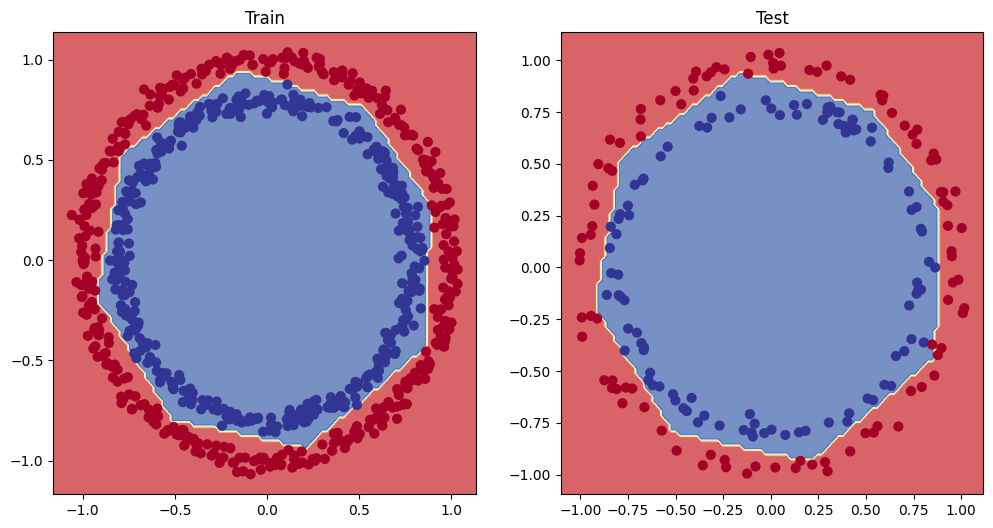

In [46]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show();

## Plot the loss (or training) curves

In [47]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.739220,0.50000
1,0.728607,0.50000
2,0.721303,0.48750
3,0.716239,0.47125
4,0.713190,0.46875
...,...,...
245,0.058672,1.00000
246,0.057798,0.99875
247,0.057338,0.99875
248,0.056753,0.99875


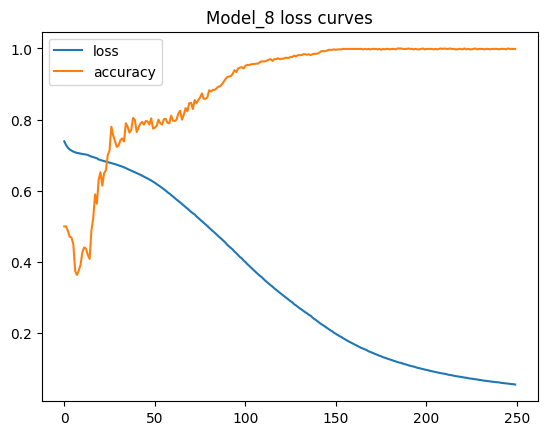

In [48]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves");

**🔑 Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

## Finding the best learning rate
To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:

* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your *while* its training.
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.

In [49]:
# Set random seed
tf.random.set_seed(42)

# Create the model(same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model
history_9 = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7462 - accuracy: 0.4950 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7442 - accuracy: 0.4938 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7420 - accuracy: 0.4950 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7397 - accuracy: 0.4938 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7374 - accuracy: 0.4963 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7347 - accuracy: 0.4950 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7321 - accuracy: 0.4963 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7294 - accuracy: 0.4950 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

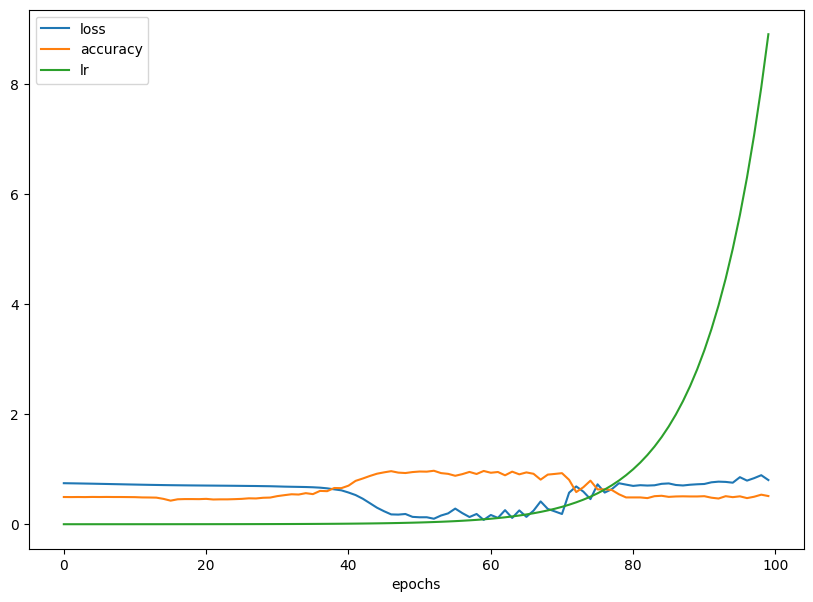

In [50]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs");

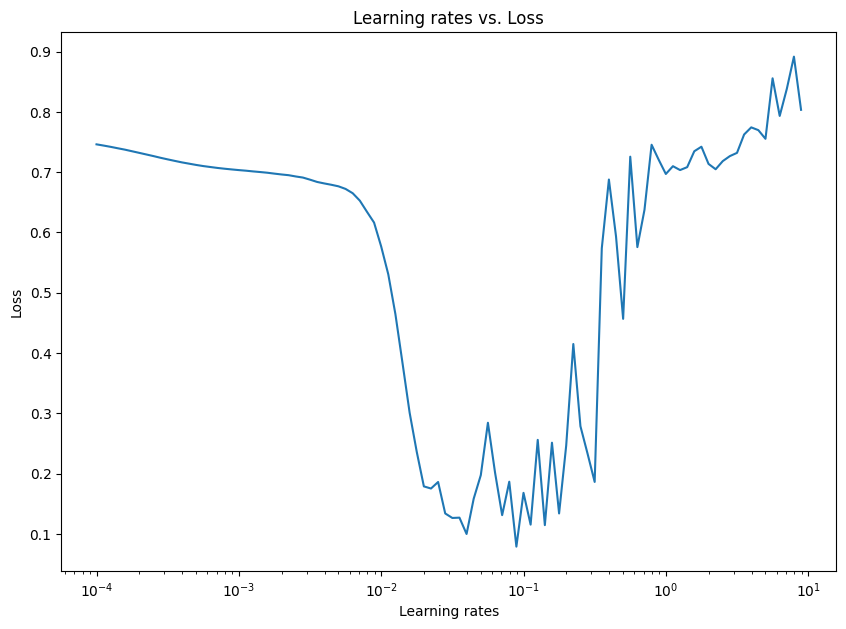

In [51]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning rates")
plt.ylabel("Loss")
plt.title("Learning rates vs. Loss");

In [52]:
len(lrs)

100

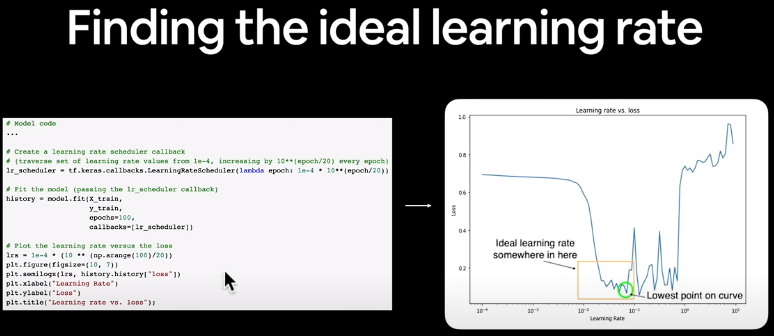

In [53]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [54]:
# Learning rate we used before (model_8)
10**-2

0.01

In [55]:
# Let's try using a higher *ideal* learning rate with the same model as before

# Set random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(lr=0.02),
                 metrics=["accuracy"])

# Fit the model
history_10 = model_10.fit(X_train, y_train, epochs=150)

Epoch 1/150
25/25 [==============================] - 1s 3ms/step - loss: 0.6986 - accuracy: 0.5088
Epoch 2/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5100
Epoch 3/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.5175
Epoch 4/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.5238
Epoch 5/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6821 - accuracy: 0.5275
Epoch 6/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.5250
Epoch 7/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.5337
Epoch 8/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6793 - accuracy: 0.5400
Epoch 9/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6787 - accuracy: 0.5400
Epoch 10/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6779 - accuracy: 0.5412
Epoch 11/

In [56]:
# Evaluate model_10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.2220 - accuracy: 0.9750


[0.22203907370567322, 0.9750000238418579]

In [57]:
# Evaluate model 8 on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0852 - accuracy: 0.9900


[0.08522428572177887, 0.9900000095367432]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


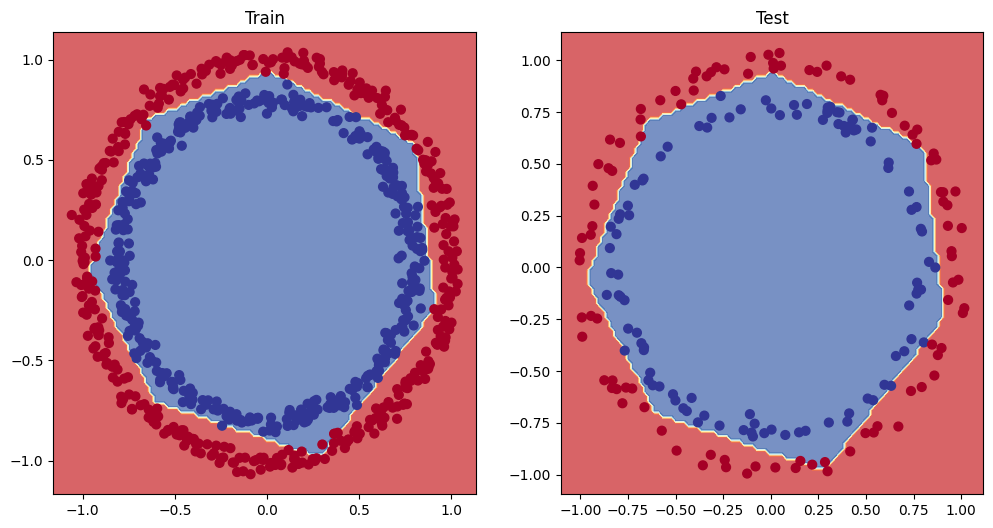

In [58]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show();

## More classification evaluation methods
Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:

* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn) - [link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

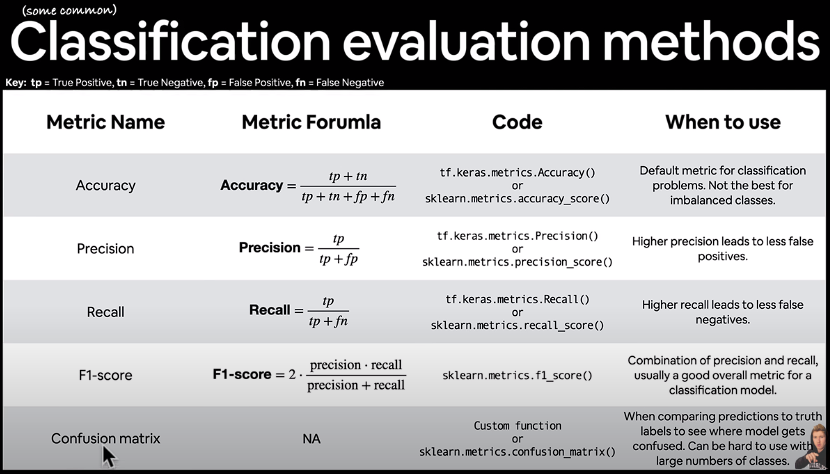

In [59]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.2220 - accuracy: 0.9750
Model loss on the test set: 0.22203907370567322
Model accuracy on the test set: 97.50%


How about a confusion matrix?
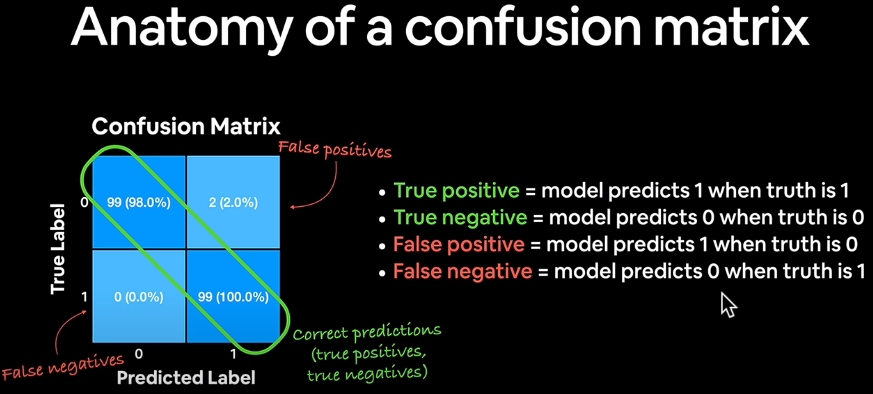

In [61]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 4ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [62]:
y_test[:10]

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [63]:
y_preds[:10]

array([[0.8811855 ],
       [0.40463927],
       [0.8463506 ],
       [0.10212382],
       [0.84402966],
       [0.49263924],
       [0.32166657],
       [0.10366501],
       [0.7687051 ],
       [0.27524364]], dtype=float32)

Oops... looks like our predictions array has come out in **prediction probability** form... the standard output from the sigmoid (or softmax) activation functions.

In [64]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [66]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[96,  4],
       [ 1, 99]])

How about we prettify our confusion matrix?

In [ ]:
# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html?highlight=plot%20confusion%20matrix#sklearn.metrics.plot_confusion_matrix

